# Аналитика в авиакомпании
# Описание проекта
Имеются файлы, в которых содержатся результаты запросов из предыдущих заданий.

query_1.csv — результат первого запроса. В нём содержится информация о:

- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса. В нём содержится информация о:

- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

# Описание данных. База данных об авиаперевозках:
Таблица airports — информация об аэропортах:

- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона

Таблица aircrafts — информация об самолётах:

- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

Таблица tickets — информация о билетах:

- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:

- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

- ticket_no — номер билета
- flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях

- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

# Для этих двух наборов данных нужно:
- импортировать файлы,
- изучить данные в них,
- проверить типы данных на корректность,
- выбрать топ-10 городов по количеству рейсов.

# Постройте графики и сделайте выводы по каждому из графиков:
- модели самолетов и количество рейсов,
- топ-10 городов и количество рейсов.

##  Изучение данных из файла.
### Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Рассмотрим данные по количеству совершенных полетов по каждой модели самолета.

In [4]:
models_and_flights_amount = pd.read_csv('/datasets/query_1.csv')
models_and_flights_amount.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
models_and_flights_amount.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.00,"2,035.62","1,965.20",300.00,605.25,795.00,"4,250.25","4,557.00"


In [6]:
models_and_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


# Промежуточный вывод
Пропуски в данных отсутствуют. В столбце model данные имеют подходящий нам текстовый формат (object), значения в столбце flights_amount целочисленные - подходящий.

### Построим Bar-plot по количеству совершенных полетов по каждой модели самолета.

In [7]:
(models_and_flights_amount.sort_values(by='flights_amount', ascending=False).reset_index(drop=True).style
                                        .bar(subset=['flights_amount'], color='orange', vmin=0, width=100)
                                        .set_caption('Данные по количеству совершенных полетов по каждой модели самолета')
)

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


### Построим график по количеству совершенных полетов по каждой модели самолета

In [8]:
model_and_flights_amount_plot = models_and_flights_amount.sort_values(by='flights_amount', ascending=False).head(10)
model_and_flights_amount_plot

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


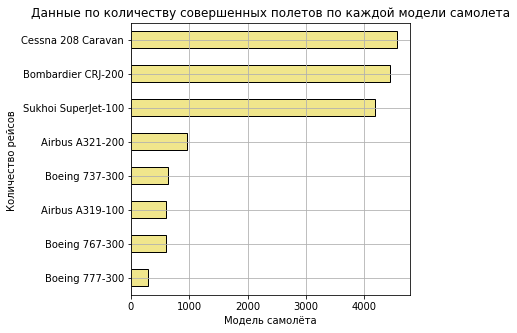

In [9]:
ax = model_and_flights_amount_plot.sort_values(by='flights_amount').plot(x='model',
                                                                    y='flights_amount',
                                                                    kind='barh',
                                                                    color='khaki', 
                                                                    ec='black',
                                                                    grid=True,
                                                                    figsize=(5, 5))
plt.title('Данные по количеству совершенных полетов по каждой модели самолета')
ax.get_legend().remove()
plt.xlabel('Модель самолёта')
plt.ylabel('Количество рейсов ')
plt.show();

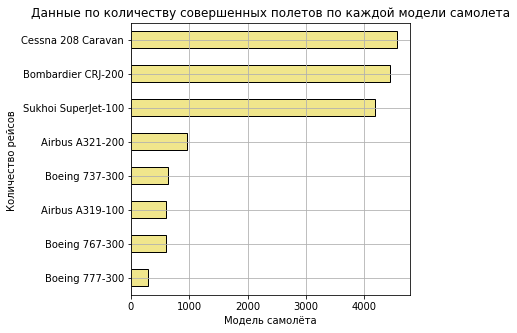

In [29]:
ax = model_and_flights_amount_plot.sort_values(by='flights_amount').plot(x='model', 
                                                                         y='flights_amount',
                                                                         kind='barh',
                                                                         color='khaki', 
                                                                         ec='black',
                                                                         grid=True,
                                                                         figsize=(5, 5),
                                                                         legend=False)
plt.title('Данные по количеству совершенных полетов по каждой модели самолета')
plt.xlabel('Модель самолёта')
plt.ylabel('Количество рейсов ')
plt.show();

# Промежуточный вывод¶

3 модели , которые являются лидерами по частоте использования в России (за период сентябрь 2018 года):

- Cessna 208 Caravan - 4557 перелетов;
- Bombardier CRJ-200 - 4446 перелетов;
- Sukhoi SuperJet-100 - 4185 перелетов.

### Рассмотрим данные второго файла

In [10]:
city_and_average_flights = pd.read_csv('/datasets/query_3.csv')
city_and_average_flights.tail(10)

,city,average_flights
91,Хабаровск,6.55
92,Ханты-Мансийск,8.42
93,Чебоксары,5.00
94,Челябинск,6.71
95,Череповец,2.16
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74
100,Ярославль,1.32


In [11]:
city_and_average_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.00,5.49,13.12,1.00,2.00,3.00,5.87,129.77


In [12]:
city_and_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных корректны. Внесем небольшие коррективы - округлим до 2 знаков после запятой столбец average_flights.

In [13]:
city_and_average_flights['average_flights'] = city_and_average_flights['average_flights'].round(2)

### Построим Bar-plot по среднему количеству рейсов в день по городам.

In [14]:
(city_and_average_flights.sort_values(by='average_flights', ascending=False).reset_index(drop=True).style
                                        .bar(subset=['average_flights'], color='orange', vmin=0, width=100)
                                        .set_caption('Данные по количеству совершенных полетов по каждой модели самолета')
)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10
8,Сочи,9.61
9,Ульяновск,9.58


### Построим график по среднему количеству рейсов в день по городам.

In [15]:
city_and_average_flights_plot = city_and_average_flights.sort_values(by='average_flights', ascending=False).head(10)
city_and_average_flights_plot

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [28]:
top_10 = city_and_average_flights.nlargest(10, 'average_flights')
top_10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


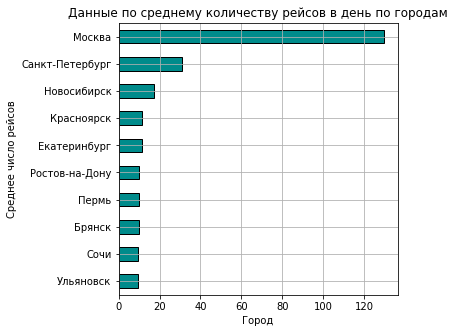

In [16]:
city_and_average_flights_plot.sort_values(by='average_flights').plot(x='city',
                                                                     y='average_flights',
                                                                     kind='barh',
                                                                     color='darkcyan', 
                                                                     ec='black',
                                                                     grid=True,
                                                                     figsize=(5, 5)).get_legend().remove()
plt.title('Данные по среднему количеству рейсов в день по городам')
plt.xlabel('Город')
plt.ylabel('Среднее число рейсов')
plt.show();

Построим график по среднему количеству рейсов в день по городам (все города).

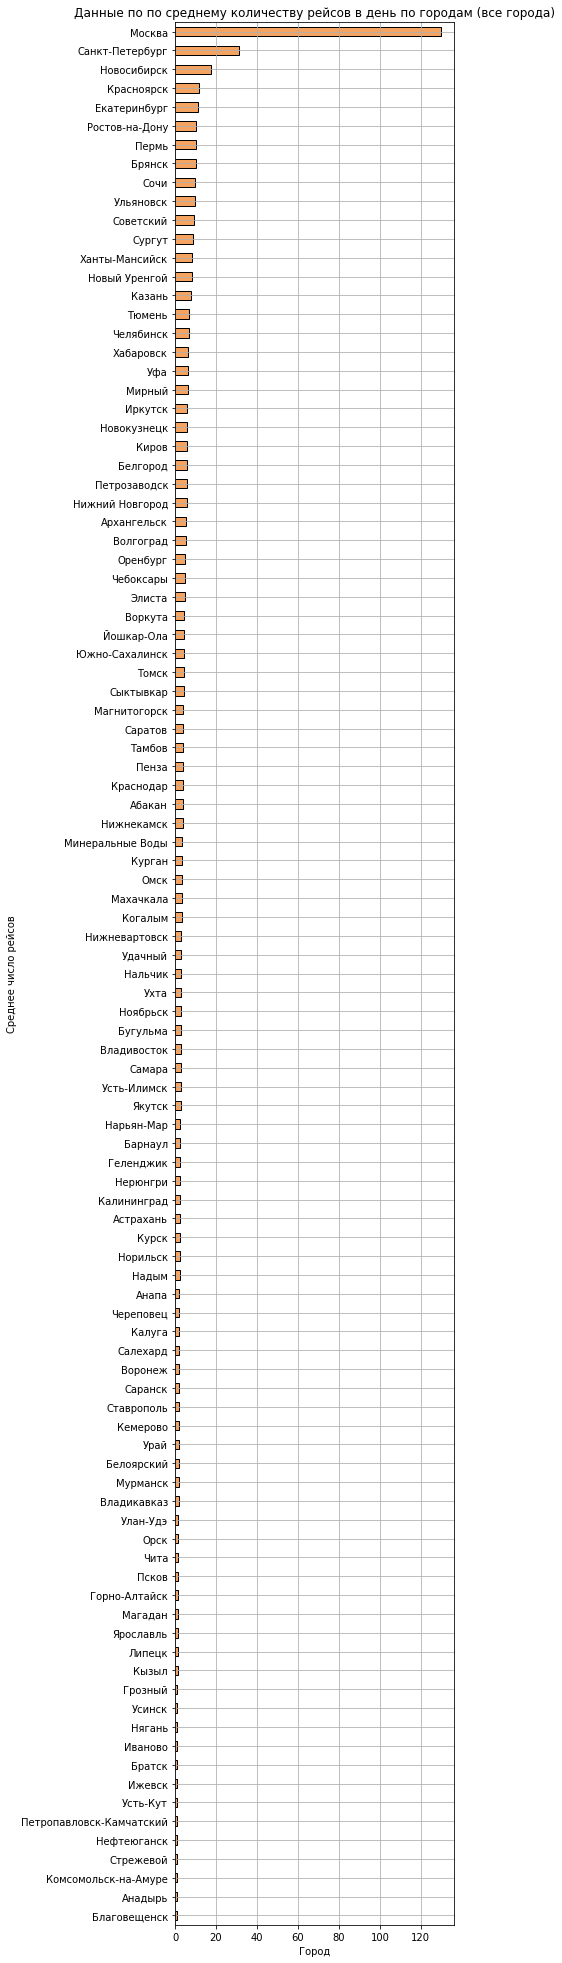

In [17]:
city_and_average_flights
city_and_average_flights.sort_values(by='average_flights').plot(x='city',
                                                                     y='average_flights',
                                                                     kind='barh',
                                                                     color='sandybrown', 
                                                                     ec='black',
                                                                     grid=True,
                                                                     figsize=(5,35)).get_legend().remove()
plt.title('Данные по по среднему количеству рейсов в день по городам (все города)')
plt.xlabel('Город')
plt.ylabel('Среднее число рейсов')
plt.show();

# Промежуточный вывод
Ожидаемо, что Москва впереди — это транспортный пул в любое время года. 2 место занимает Санкт-Пеербург, а 3 место - Новосибирск  Остальные города отличаются более низкими значениями.

## Загружаем датафрейм с фестивалями.

In [18]:
festivals = pd.read_csv('/datasets/query_last.csv')

In [19]:
print('Количество строк - {}'.format(festivals.shape[0]))

Количество строк - 10


In [20]:
festivals.style.set_caption('Данные по фестивалям')

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,nan,nan
3,33,51378,nan,nan
4,34,51492,nan,nan
5,35,51360,nan,nan
6,36,51386,36,Видфест
7,37,51670,nan,nan
8,38,51518,nan,nan
9,39,51623,nan,nan


In [21]:
festivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


# Промежуточный вывод
Данные нормальные, с ними можно работать. NaN'ы нам не помешают, а наоборот, даже помогут при формировании датафреймов с днями, когда был фестиваль и когда не был.


### Формулировка гипотезы

Гипотеза: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Для проверки гипотезы будем использовать t-критерий Стьюдента, т.к. выборки независимы между собой.
Определим пороговое значение alpha = 0.05.

Н0: (предположение о том, что между данными у нас нет связи) Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
Н1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

Формируем 2 датафрейма: 1 - с неделями, когда были фестивали; 2 - с неделями, когда фестивалей не проводилось:

In [22]:
festival_days = festivals[festivals['festival_week'].notnull()]['ticket_amount']
not_festival_dats = festivals[festivals['festival_week'].isnull()]['ticket_amount']

### Проверка гипотезы.
Установим параметр equal_var = False, т.к. пусть и выборки независимы между собой, но мы не уверены, что они имеют одинаковую дисперсию:

In [23]:
from scipy.stats import ttest_ind
import scipy.stats as st

In [24]:
stat, p = ttest_ind(festival_days, not_festival_dats, equal_var=False)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')
print('\nИтог - {}'.format('отклоняем нулевую гипотезу' if p <= 0.05 else 'оставляем в силе нулевую гипотезу'))

t = -1.1248513751916296
p-value = 3.7743249317e-01

Пороговое значение alpha = 0.05

Итог - оставляем в силе нулевую гипотезу


# Промежуточный вывод

Получается, что верно следующее утверждение - H0 "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время".

# Общий вывод
В результате проведеной проектной работе мной были рассмотрены данные нескольких файлов и совершена предобработка. Данные были проверены на наличие пропущенных значений, некорретные типы данных. Все данные представлены в удобном формате. На основании всего вышесказанного мы можем констатировать следующее - самыми используемыми моделями самолета (в сентябре 2018 года) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Небольшие самолёты приносят меньший доход, в сравнении с Airbus и Boeing. Однако, в связи с международной обстановкой, общим экономическим кризисом:
- количество вылетом в другие страны в разы сократились,
- платежеспособность населения снижена,
- число желающих путешествовать, тем более на дальние расстояния сократилось.

Использование таких моделей как Airbus и Boeing - нерентабельно, в связи с затратами и неполной окупаемостью.

В тоже время пришли к выводу, что в дни фестивалей средний спрос на авиабилеты не отличается от спрос на авиабилеты в те дни, когда фестивали не проводятся.